### 로지스틱 회귀

- 선형회귀를 통해 예측선을 찾고 그 선을 경계선으로 사용하여 분류 예측한다.
- 경계선의 정확도를 위해 sigmoid 함수를 이용하여 직선을 S자 형 선으로 변경하여 경계선을 확정한다.

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 형태소 백터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 백터를 학습 백터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 출력 창 청소를 위한 함수
from IPython.display import clear_output

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 현재 프로젝트를 gpu에 할당한다.
# 컴퓨터의 GPU는 메모리를 가지고 있다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# 데이터
x_data = [2, 4, 6, 8, 10, 12, 14]
y_data = [0, 0, 0, 1, 1, 1, 1]

print(x_data)
print(y_data)

[2, 4, 6, 8, 10, 12, 14]
[0, 0, 0, 1, 1, 1, 1]


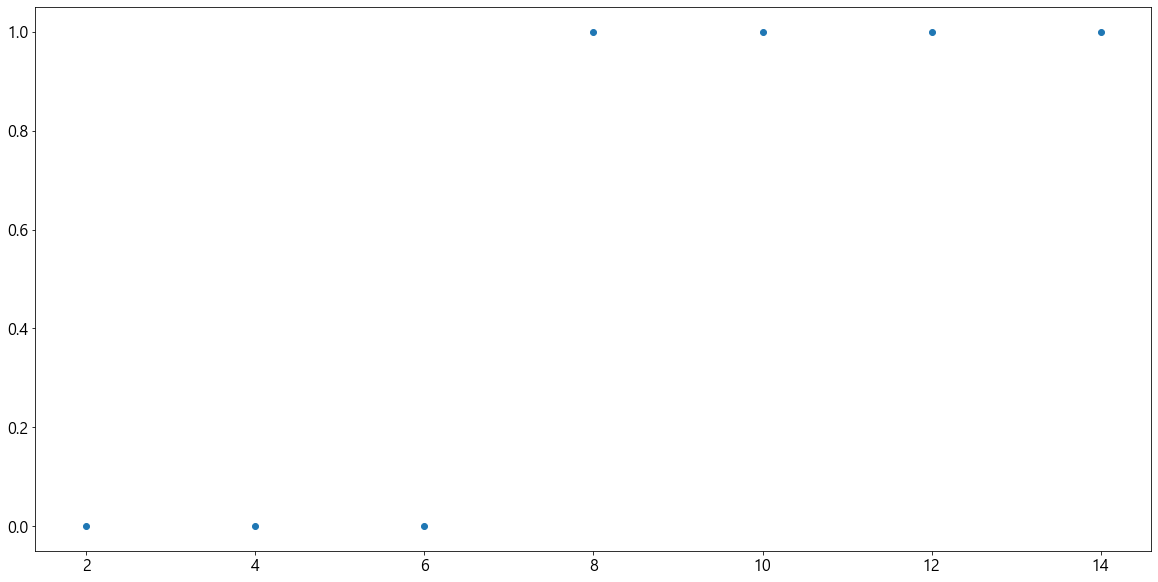

In [3]:
# 그래프로 표현하기
plt.scatter(x_data, y_data)
plt.show()

In [4]:
# a와 b값
a = 0
b = 0

In [5]:
# 학습률
lr = 0.05

In [6]:
# 시그모이드 함수
def sigmoid(x) :
    return 1 / (1 + np.e ** (-x))

In [7]:
# 학습 횟수
epochs = 20000

In [8]:
# ndarray를 생성한다.
x_data2 = np.array(x_data)
y_data2 = np.array(y_data)

print(x_data2)
print(y_data2)

[ 2  4  6  8 10 12 14]
[0 0 0 1 1 1 1]


epoch : 19000, a : 1.9733180733601767, b : -13.645824351055765


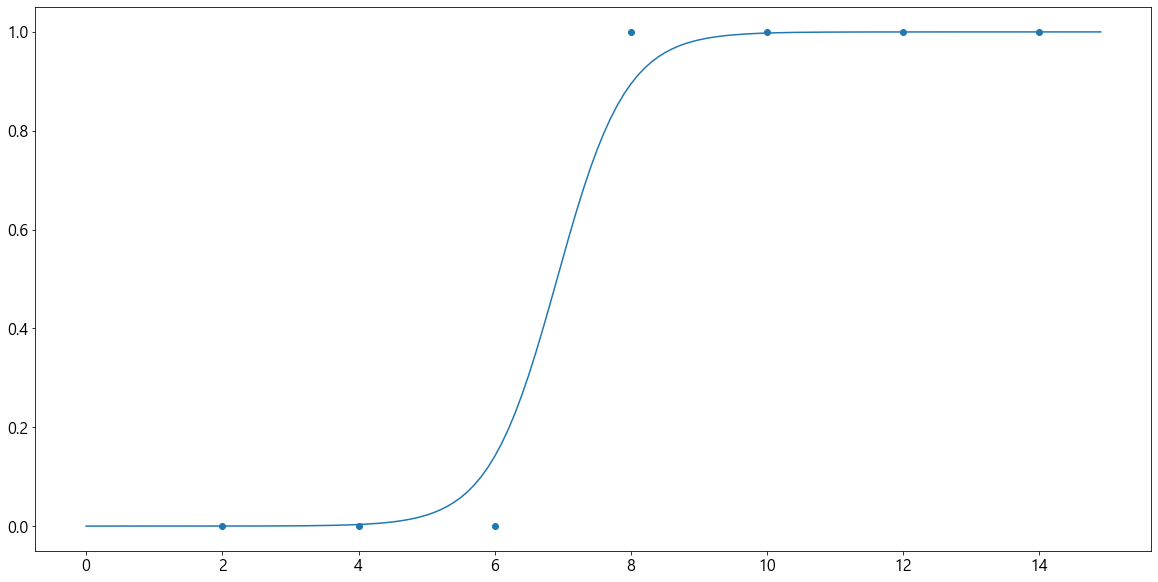

In [9]:
# 학습한다.
# 학습 횟수 만큼 반복한다.
for i in range(epochs) :
    # 현재의 기울기와 절편을 이용해 예측 결과를 가져온다.
    y_pred = sigmoid(a * x_data2 + b)
    # print(y_pred)
    # 오차를 구한다.
    error = y_pred - y_data2
    # print(error)
    
    # a와 b에대한 편미분
    a_diff = (1 / len(x_data2)) * sum(x_data2 * error)
    # a와 b에대한 편미분
    b_diff = (1 / len(x_data2)) * sum(error)
    
    # print(a_diff)
    # print(b_diff)
    
    # 학습률을 곱해 기존의 a와 b를 업데이트 한다.
    a = a - (lr * a_diff)
    b = b - (lr * b_diff)
    
    # print(기울기)
    # print(절편)
    # 1000회 마다 한번씩 출력한다.
    if i % 1000 == 0 :
        time.sleep(1)
        clear_output(wait=True)
        print(f'epoch : {i}, a : {a}, b : {b}')
        # 그래프로 확인한다.
        plt.scatter(x_data2, y_data2)
        x_range = np.arange(0, 15, 0.1)
        plt.plot(x_range, np.array([sigmoid(a * x + b) for x in x_range]))
        plt.show()

In [11]:
y_pred = (a * x_data2) + b
y_pred = y_pred > 0
y_pred = y_pred.astype(int)
y_pred

array([0, 0, 0, 1, 1, 1, 1])